In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [ ]:
df = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\fdf_gdf.csv', low_memory=False, sep=",")

In [3]:
# Convert categorical columns to category type for memory efficiency
df["rideable_type"] = df["rideable_type"].astype("category")
df["start_station_name"] = df["start_station_name"].astype("category")
df["end_station_name"] = df["end_station_name"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")
df["day_of_week"] = df["day_of_week"].astype("category")
df["holiday"] = df["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df["holiday"] = df["holiday"].astype("category")

df['month'] = df['month'].astype('int32')

df["ride_duration"] = pd.to_timedelta(df["ride_duration"])

In [4]:
df_w2 = df[df['start_ward'] == 2]

In [5]:
zero_rows = (df_w2['start_station_id'] == 0).sum()
print(f"Number of rows with start_station_id = 0: {zero_rows}")

Number of rows with start_station_id = 0: 11791


In [6]:
# Remove the rows where start_station_id == 0
df_w2 = df_w2[df_w2['start_station_id'] != 0]


In [7]:
# Create a copy of df_w2
df_w2 = df_w2.copy()

In [8]:
# Manual encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy DataFrame to avoid modifying original
df_encoded = df_w2.copy()

# Convert categorical columns to string (avoids mixed-type errors)
df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']] = df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']].astype(str)

### 1️⃣ Manually Encode 'holiday' and 'is_weekend' ###
df_encoded['holiday'] = df_encoded['holiday'].map({'Yes': 0, 'No': 1})
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({'Yes': 0, 'No': 1})

### 2️⃣ Label Encode 'day_of_week' ###
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(day_mapping)

### 3️⃣ Label Encode 'season' ###
season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
df_encoded['season'] = df_encoded['season'].map(season_mapping)

# ✅ Final DataFrame Preview
print(df_encoded.head())


     ride_id  rideable_type          started_at            ended_at  \
3    8494852   classic_bike 2023-07-21 21:31:20 2023-07-21 21:38:29   
5    8006328  electric_bike 2023-06-18 00:26:26 2023-06-18 00:37:54   
8    9276322   classic_bike 2023-09-11 18:01:16 2023-09-11 18:20:19   
16  10564381   classic_bike 2023-12-14 17:54:03 2023-12-14 19:01:34   
18   8832736   classic_bike 2023-08-13 13:45:19 2023-08-13 13:52:44   

                start_station_name  start_station_id  \
3   New Hampshire Ave & Ward Pl NW           31212.0   
5        13th St & New York Ave NW           31227.0   
8                    8th & H St NW           31228.0   
16                  19th & G St NW           31279.0   
18      M St & Pennsylvania Ave NW           31246.0   

                          end_station_name  end_station_id  start_lat  \
3                           16th & R St NW         31282.0  38.905711   
5                     16th & Harvard St NW         31135.0  38.900273   
8           New H

In [9]:
df_numeric = df_encoded.select_dtypes(include=['float', 'int64']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343352 entries, 3 to 839782
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            343352 non-null  int64  
 1   start_station_id   343352 non-null  float64
 2   end_station_id     343352 non-null  float64
 3   start_lat          343352 non-null  float64
 4   start_lng          343352 non-null  float64
 5   end_lat            343352 non-null  float64
 6   end_lng            343352 non-null  float64
 7   distance           343352 non-null  float64
 8   year               343352 non-null  int64  
 9   season             343352 non-null  int64  
 10  day_of_week        343352 non-null  int64  
 11  holiday            343352 non-null  int64  
 12  is_weekend         343352 non-null  int64  
 13  start_ward         343352 non-null  int64  
 14  end_ward           343352 non-null  int64  
 15  ride_duration_min  343352 non-null  float64
dtypes: floa

In [10]:
# Convert datetime columns (started_at and ended_at) to datetime64 format.
import pandas as pd

# Ensure datetime format
df_encoded['started_at'] = pd.to_datetime(df_encoded['started_at'])
df_encoded['ended_at'] = pd.to_datetime(df_encoded['ended_at'])

# Extract hours
df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

In [11]:
# Ensure the 'start_hour' column exists in the DataFrame
if 'start_hour' not in df_encoded.columns:
    # Extract the hour from the 'started_at' column
    df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

# Ensure all selected columns exist in the DataFrame
required_columns = ["end_ward",
                    "started_at",
                    "start_hour",
                    'day_of_week',
                    'month',
                    'holiday',
                    'is_weekend',
                    'season'
                    ]

missing_columns = [col for col in required_columns if col not in df_encoded.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing in the DataFrame: {missing_columns}")

# Select features to predict bike rides
df_select = df_encoded[required_columns]


In [12]:
# Create a copy of df_select
df_select = df_select.copy()

In [13]:
# Ensure the 'date' column exists in df_select
df_select['date'] = df_select['started_at'].dt.date

# Aggregate the data by date
df_daily = df_select.groupby('date', as_index=False).agg(
    ride_count=('started_at', 'count'),
    # start_ward=('start_ward', 'first'),  
    end_ward=('end_ward', 'first'),
    month=('month', 'first'),
    day_of_week=('day_of_week', 'first'),
    holiday=('holiday', 'max'),  # If any ride that day was on a holiday, keep 1
    is_weekend=('is_weekend', 'max'),  # If any ride was on a weekend, keep 1
    season=('season', 'first')  
)

print(df_daily)

           date  ride_count  end_ward  month  day_of_week  holiday  \
0    2023-01-01         510         2      1            6        0   
1    2023-01-02         571         2      1            0        0   
2    2023-01-03         631         1      1            1        1   
3    2023-01-04         676         2      1            2        1   
4    2023-01-05         715         2      1            3        1   
..          ...         ...       ...    ...          ...      ...   
360  2023-12-27         166         2     12            2        1   
361  2023-12-28         560         6     12            3        1   
362  2023-12-29         640         2     12            4        1   
363  2023-12-30         461         2     12            5        1   
364  2023-12-31         416         6     12            6        1   

     is_weekend  season  
0             0       3  
1             1       3  
2             1       3  
3             1       3  
4             1       3  
.. 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
multivariate = df_daily.drop('ride_count',axis='columns')
ride_count = df_daily["ride_count"]

print(multivariate.shape)
print(ride_count.shape)

(365, 7)
(365,)


In [16]:
df_daily.dtypes

date           object
ride_count      int64
end_ward        int64
month           int32
day_of_week     int64
holiday         int64
is_weekend      int64
season          int64
dtype: object

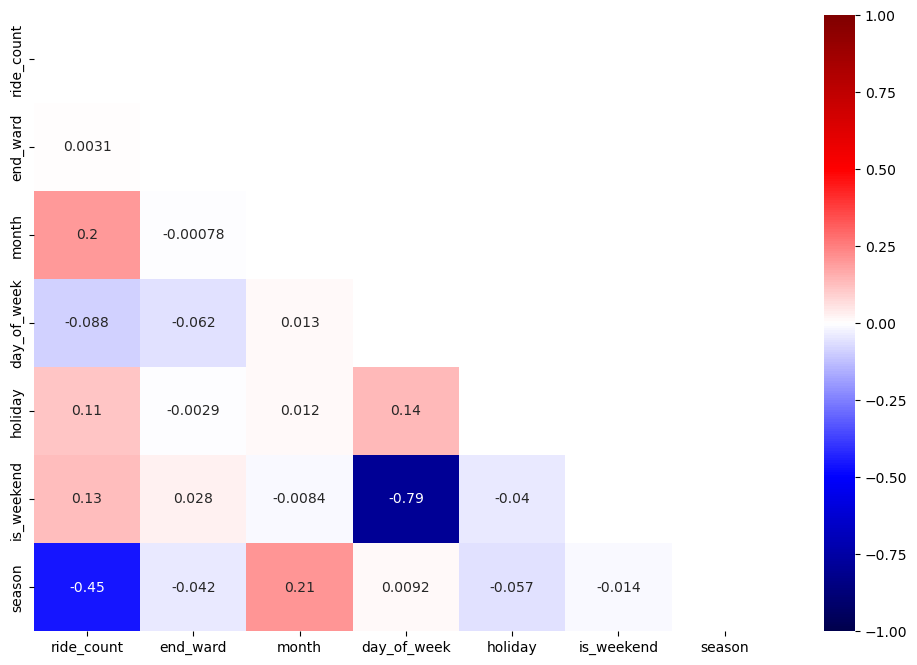

In [17]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df_daily.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

# Create a mask for the upper triangle
matrix = np.triu(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [18]:
hdf = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\cbs_hourly_modified.csv', sep=",")

In [19]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
hdf['date'] = pd.to_datetime(hdf['date'])

In [20]:
# Ensure the 'date' column is a datetime
hdf['date'] = pd.to_datetime(hdf['date'])

# Aggregate hdf to daily values by taking the mean for the desired columns
hdf_daily = hdf.groupby('date', as_index=False).agg(
    relativehumidity=('relativehumidity', 'mean'),
    temperature=('temperature', 'mean'),
    windspeed=('windspeed', 'mean')
)

In [21]:
# Ensure 'date' in df_daily is also a datetime
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Merge the daily aggregated dataframes on 'date'
df_merged = df_daily.merge(hdf_daily, on='date', how='left')
display(df_merged)

,date,ride_count,end_ward,month,day_of_week,holiday,is_weekend,season,relativehumidity,temperature,windspeed
0,2023-01-01,510,2,1,6,0,0,3,83.375000,10.458333,9.466667
1,2023-01-02,571,2,1,0,0,1,3,83.375000,10.745833,7.525000
2,2023-01-03,631,1,1,1,1,1,3,89.541667,14.229167,13.316667
3,2023-01-04,676,2,1,2,1,1,3,91.250000,15.962500,11.308333
4,2023-01-05,715,2,1,3,1,1,3,83.500000,12.558333,7.295833
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,166,2,12,2,1,1,3,52.000000,-4.350000,5.241667
361,2023-12-28,560,6,12,3,1,1,3,53.583333,-2.487500,7.650000
362,2023-12-29,640,2,12,4,1,1,3,57.791667,-3.904167,3.966667
363,2023-12-30,461,2,12,5,1,0,3,58.083333,-2.900000,7.933333


In [22]:
# Drop unnecessary columns
df_merged = df_merged.drop(columns=['date', 'month', 'day_of_week'])

In [23]:
df_merged.rename(columns={'relativehumidity': 'humidity'}, inplace=True)

## ML 

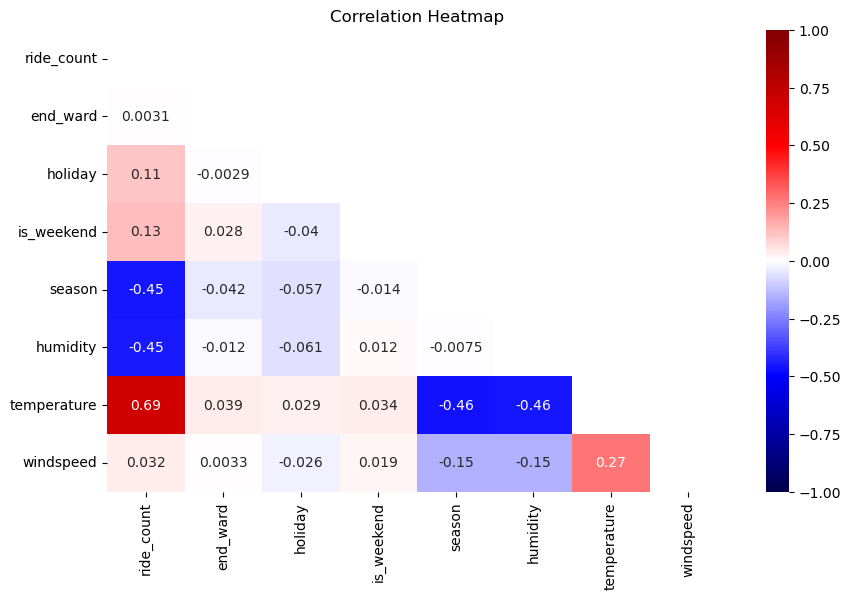

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_merged.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1, cmap='seismic')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Convert 'season' to Categorical
df_merged['season'] = df_merged['season'].astype('category')


## 7 features: 'end_ward', 'holiday', 'is_weekend', 'season', 'humidity', 'temperature', 'windspeed'

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# 🚀 Feature Selection 1: Use All Features
X1 = df_merged.drop(columns=['ride_count'])  
X1 = pd.get_dummies(X1, columns=['season'], drop_first=True)  # One-hot encode 'season'
y = df_merged['ride_count']

# 🎯 Split data for Feature Selection 1
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# ✅ Train & Evaluate Model 1 (Linear)
lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train, y_train)
y_pred_lin1 = lin_reg1.predict(X1_test)

r2_lin1 = lin_reg1.score(X1_test, y_test)
mae_lin1 = mean_absolute_error(y_test, y_pred_lin1)
mse_lin1 = mean_squared_error(y_test, y_pred_lin1)
rmse_lin1 = np.sqrt(mse_lin1)

print(f"📊 Feature Set 1 (All Features) - Linear Regression:")
print(f"R²: {r2_lin1}")
print(f"MAE: {mae_lin1}")
print(f"MSE: {mse_lin1}")
print(f"RMSE: {rmse_lin1}")

# ✅ Train & Evaluate Model 1 (Polynomial)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

poly1 = PolynomialFeatures(degree=2)
X1_poly_train = poly1.fit_transform(X1_train_scaled)
X1_poly_test = poly1.transform(X1_test_scaled)

poly_reg1 = LinearRegression()
poly_reg1.fit(X1_poly_train, y_train)
y_pred_poly1 = poly_reg1.predict(X1_poly_test)

r2_poly1 = poly_reg1.score(X1_poly_test, y_test)
mae_poly1 = mean_absolute_error(y_test, y_pred_poly1)
mse_poly1 = mean_squared_error(y_test, y_pred_poly1)
rmse_poly1 = np.sqrt(mse_poly1)

print(f"\n📊 Feature Set 1 (All Features) - Polynomial Regression:")
print(f"R²: {r2_poly1}")
print(f"MAE: {mae_poly1}")
print(f"MSE: {mse_poly1}")
print(f"RMSE: {rmse_poly1}")


📊 Feature Set 1 (All Features) - Linear Regression:
R²: 0.5623772154826951
MAE: 167.57169104421266
MSE: 46777.909056579796
RMSE: 216.282012790199

📊 Feature Set 1 (All Features) - Polynomial Regression:
R²: 0.5378465288670169
MAE: 167.06977739726028
MSE: 49400.017109910106
RMSE: 222.26114619948783


## 4 features: Drop 'end_ward', 'holiday', 'is_weekend'

In [29]:
# 🚀 Feature Selection 2: Drop end_ward, holiday, is_weekend
columns_to_drop = ['end_ward', 'holiday', 'is_weekend']
X2 = df_merged.drop(columns=[col for col in columns_to_drop if col in df_merged.columns] + ['ride_count'])
X2 = pd.get_dummies(X2, columns=['season'], drop_first=True)  # One-hot encode 'season'

# 🎯 Split data for Feature Selection 2
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# ✅ Train & Evaluate Model 2 (Linear)
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y_train)
y_pred_lin2 = lin_reg2.predict(X2_test)

r2_lin2 = lin_reg2.score(X2_test, y_test)
mae_lin2 = mean_absolute_error(y_test, y_pred_lin2)
mse_lin2 = mean_squared_error(y_test, y_pred_lin2)
rmse_lin2 = np.sqrt(mse_lin2)

print(f"\n📊 Feature Set 2 (Dropped Features) - Linear Regression:")
print(f"R²: {r2_lin2}")
print(f"MAE: {mae_lin2}")
print(f"MSE: {mse_lin2}")
print(f"RMSE: {rmse_lin2}")

# ✅ Train & Evaluate Model 2 (Polynomial)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

poly2 = PolynomialFeatures(degree=2)
X2_poly_train = poly2.fit_transform(X2_train_scaled)
X2_poly_test = poly2.transform(X2_test_scaled)

poly_reg2 = LinearRegression()
poly_reg2.fit(X2_poly_train, y_train)
y_pred_poly2 = poly_reg2.predict(X2_poly_test)

r2_poly2 = poly_reg2.score(X2_poly_test, y_test)
mae_poly2 = mean_absolute_error(y_test, y_pred_poly2)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)

print(f"\n📊 Feature Set 2 (Dropped Features) - Polynomial Regression:")
print(f"R²: {r2_poly2}")
print(f"MAE: {mae_poly2}")
print(f"MSE: {mse_poly2}")
print(f"RMSE: {rmse_poly2}")



📊 Feature Set 2 (Dropped Features) - Linear Regression:
R²: 0.5368504411151477
MAE: 171.336010853182
MSE: 49506.489862056005
RMSE: 222.5005390152033

📊 Feature Set 2 (Dropped Features) - Polynomial Regression:
R²: 0.5660151474264241
MAE: 161.92139340753425
MSE: 46389.04710597208
RMSE: 215.3811670178525


## 3 features: drop windspeed

<!-- ## 3 features: Drop windspeed -->

In [ ]:
# 🚀 Feature Selection 3: Drop windspeed
X3 = df_merged.drop(columns=['ride_count', 'windspeed'])
X3 = pd.get_dummies(X3, columns=['season'], drop_first=True)  # One-hot encode 'season'

# 🎯 Split data for Feature Selection 3
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# ✅ Train & Evaluate Model 3 (Linear)
lin_reg3 = LinearRegression()
lin_reg3.fit(X3_train, y_train)
y_pred_lin3 = lin_reg3.predict(X3_test)

r2_lin3 = lin_reg3.score(X3_test, y_test)
mae_lin3 = mean_absolute_error(y_test, y_pred_lin3)
mse_lin3 = mean_squared_error(y_test, y_pred_lin3)
rmse_lin3 = np.sqrt(mse_lin3)

print(f"\n📊 Feature Set 3 (Dropped Windspeed) - Linear Regression:")
print(f"R²: {r2_lin3}")
print(f"MAE: {mae_lin3}")
print(f"MSE: {mse_lin3}")
print(f"RMSE: {rmse_lin3}")

# ✅ Train & Evaluate Model 3 (Polynomial)
scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

poly3 = PolynomialFeatures(degree=2)
X3_poly_train = poly3.fit_transform(X3_train_scaled)
X3_poly_test = poly3.transform(X3_test_scaled)

poly_reg3 = LinearRegression()
poly_reg3.fit(X3_poly_train, y_train)
y_pred_poly3 = poly_reg3.predict(X3_poly_test)

r2_poly3 = poly_reg3.score(X3_poly_test, y_test)
mae_poly3 = mean_absolute_error(y_test, y_pred_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
rmse_poly3 = np.sqrt(mse_poly3)

print(f"\n📊 Feature Set 3 (Dropped Windspeed) - Polynomial Regression:")
print(f"R²: {r2_poly3}")
print(f"MAE: {mae_poly3}")
print(f"MSE: {mse_poly3}")
print(f"RMSE: {rmse_poly3}")



📊 Feature Set 3 (Dropped Windspeed) - Linear Regression:
R²: 0.5474106849390217
MAE: 168.5920231101421
MSE: 48377.69551522292
RMSE: 219.94930214761519

📊 Feature Set 3 (Dropped Windspeed) - Polynomial Regression:
R²: 0.6419389646453779
MAE: 143.36772260273972
MSE: 38273.479217947344
RMSE: 195.63608874118125


In [38]:
# Round the values in the summary table to two decimal places
summary_table = summary_table.round({'R²': 2, 'MAE': 2, 'MSE': 2, 'RMSE': 2})
print(summary_table)


                   Feature Selection                  Model    R²     MAE  \
0       Feature Set 1 (All Features)      Linear Regression  0.56  167.57   
1       Feature Set 1 (All Features)  Polynomial Regression  0.54  167.07   
3   Feature Set 2 (Dropped Features)      Linear Regression  0.54  171.34   
4   Feature Set 2 (Dropped Features)  Polynomial Regression  0.57  161.92   
6  Feature Set 3 (Dropped Windspeed)      Linear Regression  0.55  168.59   
7  Feature Set 3 (Dropped Windspeed)  Polynomial Regression  0.64  143.37   

        MSE    RMSE  
0  46777.91  216.28  
1  49400.02  222.26  
3  49506.49  222.50  
4  46389.05  215.38  
6  48377.70  219.95  
7  38273.48  195.64  


In [39]:
summary_table

,Feature Selection,Model,R²,MAE,MSE,RMSE
0,Feature Set 1 (All Features),Linear Regression,0.56,167.57,46777.91,216.28
1,Feature Set 1 (All Features),Polynomial Regression,0.54,167.07,49400.02,222.26
3,Feature Set 2 (Dropped Features),Linear Regression,0.54,171.34,49506.49,222.50
4,Feature Set 2 (Dropped Features),Polynomial Regression,0.57,161.92,46389.05,215.38
6,Feature Set 3 (Dropped Windspeed),Linear Regression,0.55,168.59,48377.70,219.95
7,Feature Set 3 (Dropped Windspeed),Polynomial Regression,0.64,143.37,38273.48,195.64
